#Multiple-Objective Routing Path Optimisation

#Introduction
According to the case study of this assignment, the fixed base stations suffer from limitations in coverage and capacity for reliable internet access. To address this critical challenge, this study proposes an approach: leveraging vehicles as relay nodes to extend internet connectivity through peer-to-peer communication. Specifically, we aim to design and implement effective optimization algorithms to identify the optimal routing path for data packets from each vehicle to any accessible base station. Our objective is to maximize the end-to-end data transmission rate while simultaneously minimizing the end-to-end latency, ensuring both timely and reliable data flow while maximizing communication efficiency. By achieving these goals, we hope to significantly improve internet access for vehicles on motorways.

We aim to find the optimal routing path for data packets from each vehicle to any accessible base station, maximizing end-to-end data transmission rate while minimizing latency. By employing two different optimization algorithms and critically analyzing their performance, we hope to demonstrate the potential of this approach in revolutionizing internet access for vehicles on motorways.


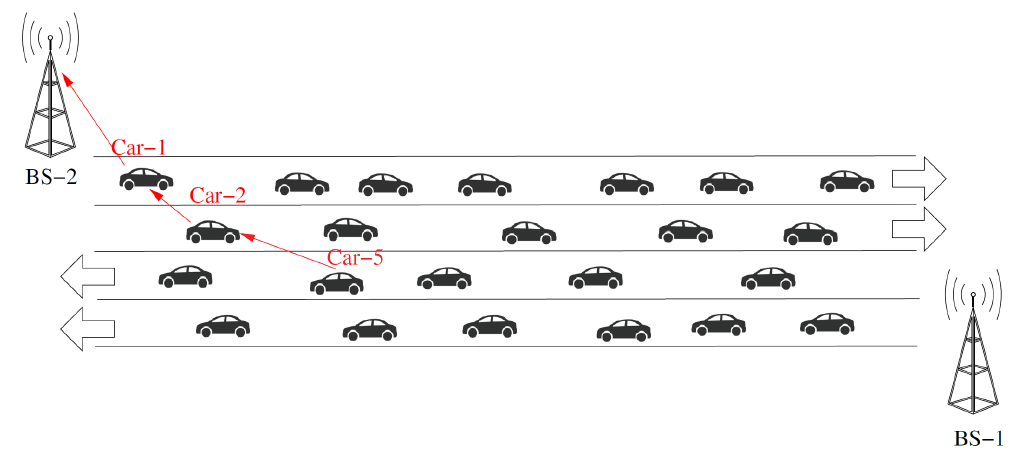

# Aim and Objectives

The aim of this assignment is to optimize routing paths for vehicle networks on motorways, addressing the pressing need for enhanced internet access.  

**Objectives:**

* Maximize end-to-end data transmission rates for vehicles.

* Minimize end-to-end latency in data packet routing paths.

* Evaluate algorithmic performance, considering critical insights and innovative solutions for enhanced internet connectivity.

#Methodology

To achieve the objectives of the given problem the roadmap was prepared on basis of following methodologies;
* Data analysis and pre-processing
* Objective function definition
* Algorithm selection and Implementation
* Experimental Evaluation of the algorithms
* Results and Discussions

# Objective Function

As per the objectives of the problem we have formulated the objective function to optimize our algorithms accordingly. According to the problem definition;

Transmission rate of the path (Tp) = min(Transmission rate between the links of a path)

Latency (L) = 50 ms for each link

Latency of a path (Lp) = 50 * number of links in a path (ms)

**Objective Function = max (Tp)/(Lp)**


# Dataset
For this assignment we have used the dataset available on the brightspace (data_file - Copy.csv), which consist of 100 cars and the coordinates of the cars. These Coordinates are used to find the distance between the cars and basestations. This distance is used to find out the transmission rate on basis of the conditions defined in the assignment brief.

Along, with this we also has information of the coordinates of the two basestations that is concatenated in the available data in the coming steps to meet the objective of the problem.

Import Required Libraries

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import heapq
import json

#Dijkstra's Algorithm
Dijkstra's algorithm is a graph search technique that produces the shortest path tree by addressing the single-source shortest path problem for a graph with non-negative edge path costs. It was designed by computer scientist Edsger Dijkstra in 1956 and published in 1959. This algorithm is frequently employed as a subroutine in other graph algorithms as well as in routing (Dijkstra, 2022). The technique determines the path with the lowest cost, or the shortest path, between a particular source vertex (node) in the graph and every other vertex. However, Dijkstra aimed to find an efficient way to determine the shortest path between two nodes in a network representing a railway system. The algorithm begins with the initialization phase, assign a tentative distance value to every vertex. Set the distance of the source vertex to 0 and the distance of all other vertices to infinity. Marks all vertices as unvisited. Through iterative selection of the unvisited vertex with the smallest tentative distance, the algorithm explores neighboring vertices, updating distances and marking vertices as visited. This process continues until all vertices are visited or the priority queue, crucial for efficiency, is empty. The output includes the shortest distance from the source vertex to every other vertex and constructs a shortest path tree encompassing these paths ​(Jason et al., 2023)​.

**Flowchart of Dijkstra's Algorithm**

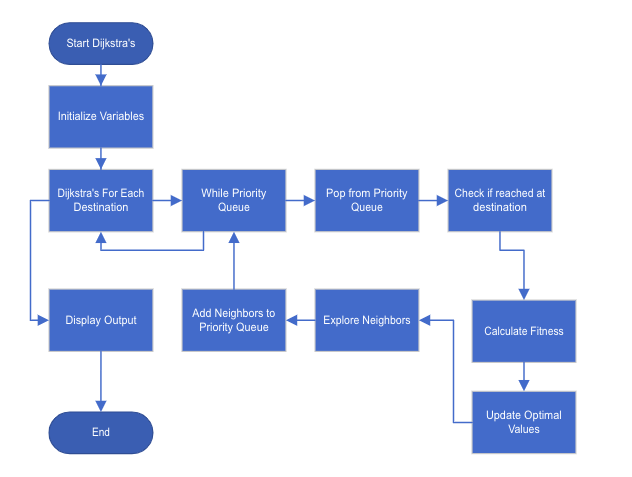

##Implementing Dijkstra

In [ ]:
# Read dataset from data_file.csv
data_file = "/content/data_file - Copy.csv"  # Replace with your file path
df = pd.read_csv(data_file)

# Adding Base Stations
bs_data = pd.DataFrame([
    {'No.': 101, 'x': -1, 'y': -1},  # BS-1
    {'No.': 102, 'x': 56325, 'y': 9}  # BS-2
])

# Appending base station data to the existing dataframe
df = pd.concat([df, bs_data])

# Extract unique integer node values including base stations
unique_nodes = df['No.'].dropna().astype(int).unique()

# Filter dataframe to contain only valid 'No.' values
df = df[df['No.'].isin(unique_nodes)]

# Calculate distance between two vehicle coordinates
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Create graph based on vehicle coordinates and distance criteria
def create_graph(vehicle_data):
    graph = {node: {} for node in unique_nodes}
    for i, row1 in vehicle_data.iterrows():
        node1 = int(row1['No.'])
        x1, y1 = row1['x'], row1['y']
        for j, row2 in vehicle_data.iterrows():
            node2 = int(row2['No.'])
            x2, y2 = row2['x'], row2['y']
            if node1 != node2:
                distance = calculate_distance(x1, y1, x2, y2)
                if distance < 6000:
                    transmission_rate = 0
                    if distance >= 4000:
                        transmission_rate = 1
                    elif distance >= 3000:
                        transmission_rate = 2
                    elif distance >= 2000:
                        transmission_rate = 4
                    elif distance >= 1000:
                        transmission_rate = 6
                    elif distance >= 500:
                        transmission_rate = 8
                    else:
                        transmission_rate = 10
                    if transmission_rate != 0:
                        graph[node1][node2] = {'transmission_rate': transmission_rate, 'latency': 50}
    return graph

# Define fitness function
def fitness_function(path, graph):
    transmission_rates = [graph[path[i]][path[i+1]]['transmission_rate'] for i in range(len(path)-1)]
    end_to_end_rate = min(transmission_rates) if transmission_rates else 0
    path_latency = (len(path)-1) * 50  # Calculate path latency
    return end_to_end_rate, path_latency

# Dijkstra's algorithm to find paths with optimized objectives
def find_optimal_path(graph, source, destinations):
    max_fitness = float('-inf')
    optimal_path = None
    optimal_end_to_end_rate = float('-inf')
    optimal_latency = float('inf')

    for destination in destinations:
        visited = set()
        priority_queue = [(-float('inf'), float('inf'), source, [])]

        while priority_queue:
            _, _, current_node, path = heapq.heappop(priority_queue)

            if current_node == destination:
                end_to_end_rate, path_latency = fitness_function(path + [destination], graph)
                if max_fitness < end_to_end_rate or (max_fitness == end_to_end_rate and optimal_latency > path_latency):
                    max_fitness = end_to_end_rate
                    optimal_path = path + [destination]
                    optimal_end_to_end_rate = end_to_end_rate
                    optimal_latency = path_latency
                break

            if current_node not in visited:
                visited.add(current_node)
                for neighbor in graph[current_node]:
                    heapq.heappush(priority_queue, (-graph[current_node][neighbor]['transmission_rate'], graph[current_node][neighbor]['latency'], neighbor, path + [current_node]))

    return optimal_end_to_end_rate, optimal_path, optimal_latency

# Main program
if __name__ == "__main__":
    # Create graph based on dataset
    vehicle_graph = create_graph(df)

    # Perform algorithm for each car node as the source
    car_nodes = [node for node in vehicle_graph if node not in [101, 102]]  # Exclude base stations
    destinations = [101, 102]  # Destinations are base stations

    optimal_paths = []

    for source_node in car_nodes:
        max_rate, optimal_path, optimal_latency = find_optimal_path(vehicle_graph, source_node, destinations)
        routing_path = [(f"Car-{optimal_path[i]}", f"{vehicle_graph[optimal_path[i]][optimal_path[i+1]]['transmission_rate']} Mbps") for i in range(1, len(optimal_path)-1)]
        routing_path.append((f"BS-{optimal_path[-1]}", f"{vehicle_graph[optimal_path[-2]][optimal_path[-1]]['transmission_rate']} Mbps"))

        result = {
            "SourceNode": f"Car-{source_node}",
            "RoutingPath": ", ".join([f"({node}, {rate})" for node, rate in routing_path]),
            "EndToEndTransmissionRate": f"{max_rate} Mbps"
        }

        optimal_paths.append(result)

    for result in optimal_paths:
        print(json.dumps(result, indent=2))


{
  "SourceNode": "Car-1",
  "RoutingPath": "(BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "10 Mbps"
}
{
  "SourceNode": "Car-2",
  "RoutingPath": "(Car-1, 10 Mbps), (BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-3",
  "RoutingPath": "(Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-4",
  "RoutingPath": "(Car-3, 6 Mbps), (Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-5",
  "RoutingPath": "(Car-4, 10 Mbps), (Car-3, 6 Mbps), (Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-6",
  "RoutingPath": "(Car-5, 10 Mbps), (Car-4, 10 Mbps), (Car-3, 6 Mbps), (Car-2, 6 Mbps), (Car-1, 10 Mbps), (BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-7",
  "RoutingPath": "(Car-54, 10 Mbps), (Car-6, 10 Mbps), (Car-5, 10 Mbps), 

In [ ]:
d_output_file = "Dijkstra_optimal_paths.json"

with open(d_output_file, 'w') as json_file:
    json.dump(optimal_paths, json_file, indent=4)

print(f"Results written to {d_output_file}")

Results written to Dijkstra_optimal_paths.json


In [ ]:
import pandas as pd

# Convert optimal_paths to a DataFrame
dijkstra_df = pd.DataFrame(optimal_paths)

# Save the DataFrame to an Excel file
excel_output_file = "Dijkstra_optimal_paths.xlsx"
dijkstra_df.to_excel(excel_output_file, index=False)

print(f"Results written to {excel_output_file}")


Results written to Dijkstra_optimal_paths.xlsx


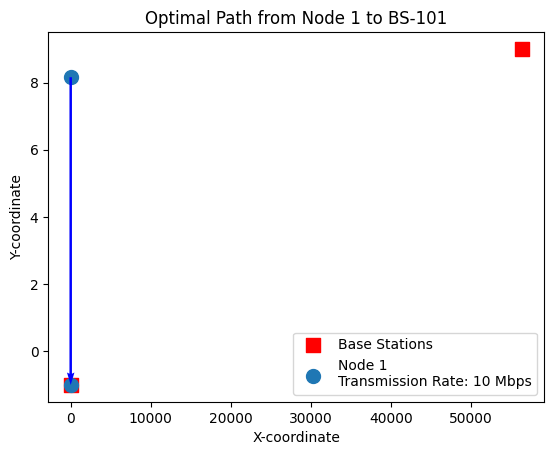

In [ ]:
import matplotlib.pyplot as plt

def plot_optimal_path(df, optimal_path, vehicle_graph, destinations):
    plt.scatter(df[df['No.'].isin(destinations)]['x'], df[df['No.'].isin(destinations)]['y'], c='red', marker='s', s=100, label='Base Stations')

    for i in range(len(optimal_path) - 1):
        current_path = optimal_path[i:i + 2]
        current_path_coords = [(df[df['No.'] == node]['x'].values[0], df[df['No.'] == node]['y'].values[0], node) for node in current_path]
        x_coords, y_coords, node_labels = zip(*current_path_coords)

        plt.scatter(x_coords, y_coords, s=100, label=f'Node {node_labels[0]}\nTransmission Rate: {vehicle_graph[optimal_path[i]][optimal_path[i+1]]["transmission_rate"]} Mbps')

        plt.quiver(x_coords[0], y_coords[0], x_coords[1] - x_coords[0], y_coords[1] - y_coords[0],
                   angles='xy', scale_units='xy', scale=1, color='blue', width=0.005)

    plt.title(f"Optimal Path from Node {optimal_path[0]} to BS-{optimal_path[-1]}")
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.show()

# Main program
if __name__ == "__main__":
    # Create graph based on dataset
    vehicle_graph = create_graph(df)

    # Perform algorithm for one car node as the source
    source_node = 1
    destinations = [101, 102]  # Destinations are base stations

    max_rate, optimal_path, optimal_latency = find_optimal_path(vehicle_graph, source_node, destinations)

    if optimal_path is not None:
        plot_optimal_path(df, optimal_path, vehicle_graph, destinations)
    else:
        print(f"No valid path found for Node-{source_node} to any base station.")


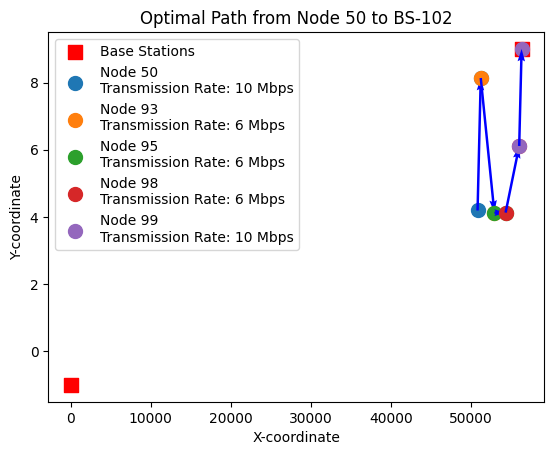

In [ ]:
# Main program
if __name__ == "__main__":
    # Create graph based on dataset
    vehicle_graph = create_graph(df)

    # Perform algorithm for one car node as the source
    source_node = 50
    destinations = [101, 102]  # Destinations are base stations

    max_rate, optimal_path, optimal_latency = find_optimal_path(vehicle_graph, source_node, destinations)

    if optimal_path is not None:
        plot_optimal_path(df, optimal_path, vehicle_graph, destinations)
    else:
        print(f"No valid path found for Node-{source_node} to any base station.")

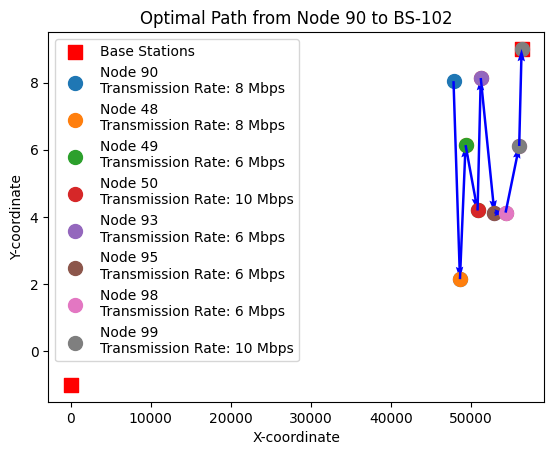

In [ ]:
# Main program
if __name__ == "__main__":
    # Create graph based on dataset
    vehicle_graph = create_graph(df)

    # Perform algorithm for one car node as the source
    source_node = 90
    destinations = [101, 102]  # Destinations are base stations

    max_rate, optimal_path, optimal_latency = find_optimal_path(vehicle_graph, source_node, destinations)

    if optimal_path is not None:
        plot_optimal_path(df, optimal_path, vehicle_graph, destinations)
    else:
        print(f"No valid path found for Node-{source_node} to any base station.")

#Ant Colony Optimization Algorithm
The Ant System (AS) is a heuristic algorithm inspired by the behaviour of ant colonies and is proposed as a computational paradigm for stochastic combinatorial optimization. Introduced in a 1996 paper by Marco Dorigo, Vittorio Maniezzo, and Alberto Colorni, the AS operates on a population of artificial ants, each representing a potential solution in a problem space. The algorithm uses positive feedback, distributed computation, and a constructive greedy heuristic to efficiently search for optimal solutions ​(Dorigo & Gambardella, 1997)​. Each ant makes probabilistic decisions based on the amount of pheromone (trail intensity) on edges and the visibility of towns. Pheromone intensities are updated after each cycle, representing a completed tour by all ants, and the process continues until convergence or a specified number of cycles. Parameters such as evaporation rate and the balance between trail intensity and visibility influence the algorithm's performance (Cheng, 2023)​. Overall, the Ant System offers a flexible and powerful optimization approach with applications.

**Flowchart for AntColony Optimization**

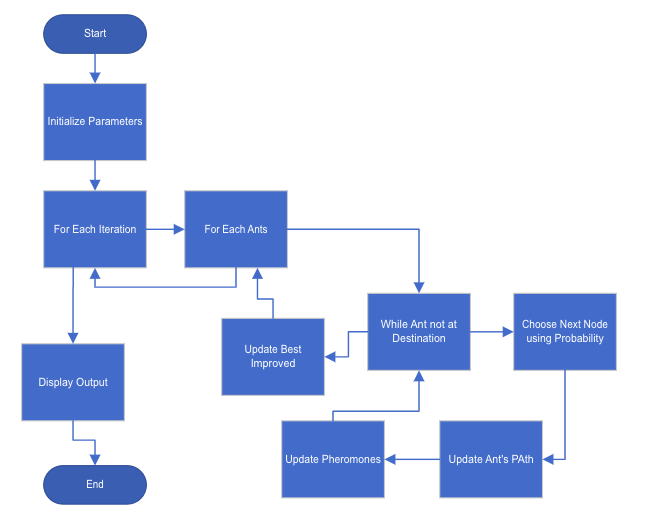

Calculate transmission rate on basis of the available conditions

In [ ]:
# Function to calculate distance from the available coordinates
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def create_graph(vehicle_data):
    unique_nodes = set(vehicle_data['No.'])
    graph = {node: {} for node in unique_nodes}

    for i, row1 in vehicle_data.iterrows():
        node1 = int(row1['No.'])
        x1, y1 = row1['x'], row1['y']
        for j, row2 in vehicle_data.iterrows():
            node2 = int(row2['No.'])
            x2, y2 = row2['x'], row2['y']
            if node1 != node2:
                distance = calculate_distance(x1, y1, x2, y2)
                transmission_rate = 0  # Default to zero
                if distance >= 6000:
                    transmission_rate = 0
                elif distance >= 4000:
                    transmission_rate = 1
                elif distance >= 3000:
                    transmission_rate = 2
                elif distance >= 2000:
                    transmission_rate = 4
                elif distance >= 1000:
                    transmission_rate = 6
                elif distance >= 500:
                    transmission_rate = 8
                else:
                    transmission_rate = 10

                if transmission_rate > 0:  # Only add edges with non-zero transmission rate
                    graph[node1][node2] = {'transmission_rate': transmission_rate, 'latency': 50}

    return graph

Implementation of Ant Colony Optimization

In [ ]:
def transmission_rate_objective(path, graph):
    transmission_rates = [graph[path[i]][path[i + 1]]['transmission_rate'] for i in range(len(path) - 1)]
    return min(transmission_rates) if transmission_rates else 0

def latency_objective(path, graph):
    return (len(path) - 1) * 50  # Calculate path latency

def fitness_function(path, graph):
    transmission_rate_obj = transmission_rate_objective(path, graph)
    latency_obj = latency_objective(path, graph)
    return transmission_rate_obj, latency_obj

def update_pheromones(paths, Q, decay_rate, pheromones, graph):
    for path in paths:
        transmission_rate_obj, latency_obj = fitness_function(path, graph)
        total_score = transmission_rate_obj + latency_obj  # Combine objectives for pheromone update
        pheromone_deposit = Q / total_score
        for i in range(len(path) - 1):
            pheromones[path[i]][path[i + 1]] = (1 - decay_rate) * pheromones[path[i]][path[i + 1]] + pheromone_deposit

def ant_colony_optimization(graph, source, destinations, num_ants=110, max_iterations=10, alpha=1.0, beta=2.0, rho=0.5, Q=1.0):
    pheromones = {node: {neighbor: 1.0 for neighbor in graph[node]} for node in graph}
    best_path = None
    best_transmission_rate = float('-inf')
    best_latency = float('inf')

    for _ in range(max_iterations):
        paths = []
        for _ in range(num_ants):
            current_node = source
            path = [current_node]
            while current_node not in destinations:
                neighbors = list(graph[current_node].keys())

                # Use transmission rate objective
                transmission_objective_values = [graph[current_node][neighbor]['transmission_rate'] for neighbor in neighbors]
                probabilities_transmission = [(pheromones[current_node][neighbor] ** alpha) * (max(1e-8, value) ** beta) for neighbor, value in zip(neighbors, transmission_objective_values)]
                probabilities_sum_transmission = sum(probabilities_transmission)
                probabilities_transmission = [prob / probabilities_sum_transmission for prob in probabilities_transmission]

                # Use latency objective
                latency_objective_values = [(graph[current_node][neighbor]['latency'] + (len(path) - 1) * 50) for neighbor in neighbors]
                probabilities_latency = [(pheromones[current_node][neighbor] ** alpha) / (max(1e-8, value) ** beta) for neighbor, value in zip(neighbors, latency_objective_values)]
                probabilities_sum_latency = sum(probabilities_latency)
                probabilities_latency = [prob / probabilities_sum_latency for prob in probabilities_latency]

                # Combine the objectives (you can adjust the weights here)
                combined_probabilities = [0.5 * prob_transmission + 0.5 * prob_latency for prob_transmission, prob_latency in zip(probabilities_transmission, probabilities_latency)]

                next_node = np.random.choice(neighbors, p=combined_probabilities)
                path.append(next_node)
                current_node = next_node
            paths.append(path)
            update_pheromones([path], Q=Q, decay_rate=rho, pheromones=pheromones, graph=graph)

        for path in paths:
            transmission_rate_obj, latency_obj = fitness_function(path, graph)
            if transmission_rate_obj > best_transmission_rate or (transmission_rate_obj == best_transmission_rate and latency_obj < best_latency):
                best_transmission_rate = transmission_rate_obj
                best_latency = latency_obj
                best_path = path

    return best_path, best_transmission_rate, best_latency

Optimal path for each car using ACO

In [ ]:
def find_optimal_paths_for_all_cars(df):
    bs_data = pd.DataFrame([
        {'No.': 101, 'x': -1, 'y': -1},
        {'No.': 102, 'x': 56325, 'y': 9}
    ])

    df = pd.concat([df, bs_data])

    unique_nodes = df['No.'].dropna().astype(int).unique()
    df = df[df['No.'].isin(unique_nodes)]

    # Create a dictionary to store optimal paths for each car
    optimal_paths = []

    for source_node in df['No.']:
        if source_node not in [101, 102]:  # Skip base stations
            destinations = [101, 102]

            vehicle_graph = create_graph(df)

            optimal_path_aco, end_to_end_rate_aco, path_latency_aco = ant_colony_optimization(vehicle_graph, source_node, destinations)

            if optimal_path_aco is not None:
                routing_path = [(f"Car-{optimal_path_aco[i]}", f"{vehicle_graph[optimal_path_aco[i]][optimal_path_aco[i+1]]['transmission_rate']} Mbps") for i in range(1, len(optimal_path_aco)-1)]
                routing_path.append((f"BS-{optimal_path_aco[-1]}", f"{vehicle_graph[optimal_path_aco[-2]][optimal_path_aco[-1]]['transmission_rate']} Mbps"))

                result = {
                    "SourceNode": f"Car-{source_node}",
                    "RoutingPath": ", ".join([f"({node}, {rate})" for node, rate in routing_path]),
                    "EndToEndTransmissionRate": f"{end_to_end_rate_aco} Mbps"
                }

                optimal_paths.append(result)
            else:
                result = {
                    "SourceNode": f"Car-{source_node}",
                    "RoutingPath": None,
                    "EndToEndTransmissionRate": None
                }

                optimal_paths.append(result)

    return optimal_paths

# Define your dataset and parameters
data_file = "/content/data_file - Copy.csv"  # Dataset
df = pd.read_csv(data_file)

# Find optimal paths for all cars
optimal_paths_for_all_cars = find_optimal_paths_for_all_cars(df)

# Print or visualize the results for each car
for car_data in optimal_paths_for_all_cars:
    print(json.dumps(car_data, indent=2))
    #print(json.dumps(result_dijkstra, indent=2))


{
  "SourceNode": "Car-1",
  "RoutingPath": "(BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "10 Mbps"
}
{
  "SourceNode": "Car-2",
  "RoutingPath": "(BS-101, 6 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-3",
  "RoutingPath": "(Car-52, 6 Mbps), (BS-101, 6 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-4",
  "RoutingPath": "(Car-52, 6 Mbps), (BS-101, 6 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-5",
  "RoutingPath": "(Car-4, 6 Mbps), (Car-52, 6 Mbps), (BS-101, 6 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-6",
  "RoutingPath": "(Car-53, 6 Mbps), (Car-52, 6 Mbps), (BS-101, 6 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-7",
  "RoutingPath": "(Car-3, 6 Mbps), (Car-52, 6 Mbps), (BS-101, 6 Mbps)",
  "EndToEndTransmissionRate": "6 Mbps"
}
{
  "SourceNode": "Car-8",
  "RoutingPath": "(Car-6, 8 Mbps), (Car-3, 6 Mbps), (Car-52, 6 Mbps), (BS-101, 6 Mbps)",
  "En

Print output as a json file

In [ ]:
output_file = "ACO_optimal_paths.json"

with open(output_file, 'w') as json_file:
    json.dump(optimal_paths_for_all_cars, json_file, indent=4)

print(f"Results written to {output_file}")


Results written to ACO_optimal_paths.json


In [ ]:
import pandas as pd

# Convert optimal_paths to a DataFrame
ACO_df = pd.DataFrame(optimal_paths_for_all_cars)

# Save the DataFrame to an Excel file
excel_output_file = "ACO_optimal_paths.xlsx"
ACO_df.to_excel(excel_output_file, index=False)

print(f"Results written to {excel_output_file}")

Results written to ACO_optimal_paths.xlsx


In [ ]:
def find_optimal_path_for_single_car(df, car_node):
    bs_data = pd.DataFrame([
        {'No.': 101, 'x': -1, 'y': -1},
        {'No.': 102, 'x': 56325, 'y': 9}
    ])

    df = pd.concat([df, bs_data])

    unique_nodes = df['No.'].dropna().astype(int).unique()
    df = df[df['No.'].isin(unique_nodes)]

    source_node = int(car_node)
    destinations = [101, 102]

    vehicle_graph = create_graph(df)

    optimal_path_aco, end_to_end_rate_aco, path_latency_aco = ant_colony_optimization(vehicle_graph, source_node, destinations)

    if optimal_path_aco is not None:
        routing_path = [(f"Car-{optimal_path_aco[i]}", f"{vehicle_graph[optimal_path_aco[i]][optimal_path_aco[i+1]]['transmission_rate']} Mbps") for i in range(1, len(optimal_path_aco)-1)]
        routing_path.append((f"BS-{optimal_path_aco[-1]}", f"{vehicle_graph[optimal_path_aco[-2]][optimal_path_aco[-1]]['transmission_rate']} Mbps"))

        result = {
            "SourceNode": f"Car-{source_node}",
            "RoutingPath": ", ".join([f"({node}, {rate})" for node, rate in routing_path]),
            "EndToEndTransmissionRate": f"{end_to_end_rate_aco} Mbps"
        }

        return result
    else:
        return {
            "SourceNode": f"Car-{source_node}",
            "RoutingPath": None,
            "EndToEndTransmissionRate": None
        }

# Example usage for a specific car node
car_node_to_check = 10
result_for_single_car = find_optimal_path_for_single_car(df, car_node_to_check)

print(json.dumps(result_for_single_car, indent=2))


{
  "SourceNode": "Car-10",
  "RoutingPath": "(Car-8, 4 Mbps), (Car-53, 4 Mbps), (BS-101, 4 Mbps)",
  "EndToEndTransmissionRate": "4 Mbps"
}


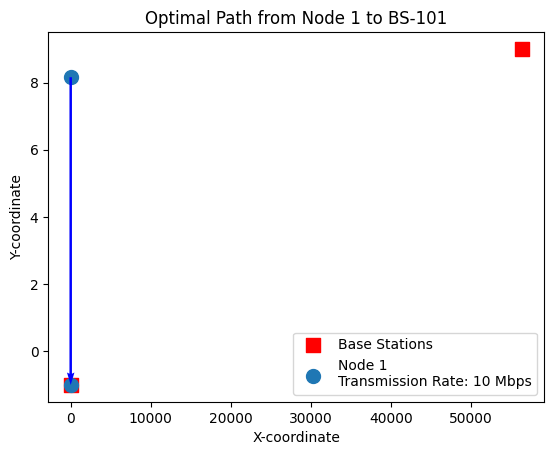

{
  "SourceNode": "Car-1",
  "RoutingPath": "(BS-101, 10 Mbps)",
  "EndToEndTransmissionRate": "10 Mbps"
}


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
import numpy as np

def find_optimal_path_for_single_car_and_visualize(df, car_node):
    bs_data = pd.DataFrame([
        {'No.': 101, 'x': -1, 'y': -1},
        {'No.': 102, 'x': 56325, 'y': 9}
    ])

    df = pd.concat([df, bs_data])

    unique_nodes = df['No.'].dropna().astype(int).unique()
    df = df[df['No.'].isin(unique_nodes)]

    source_node = int(car_node)
    destinations = [101, 102]

    vehicle_graph = create_graph(df)

    optimal_path_aco, end_to_end_rate_aco, path_latency_aco = ant_colony_optimization(vehicle_graph, source_node, destinations)

    if optimal_path_aco is not None:
        # Visualize the optimal path
        plot_optimal_path(df, optimal_path_aco, vehicle_graph, destinations)

        routing_path = [(f"Car-{optimal_path_aco[i]}", f"{vehicle_graph[optimal_path_aco[i]][optimal_path_aco[i+1]]['transmission_rate']} Mbps") for i in range(1, len(optimal_path_aco)-1)]
        routing_path.append((f"BS-{optimal_path_aco[-1]}", f"{vehicle_graph[optimal_path_aco[-2]][optimal_path_aco[-1]]['transmission_rate']} Mbps"))

        result = {
            "SourceNode": f"Car-{source_node}",
            "RoutingPath": ", ".join([f"({node}, {rate})" for node, rate in routing_path]),
            "EndToEndTransmissionRate": f"{end_to_end_rate_aco} Mbps"
        }

        return result
    else:
        return {
            "SourceNode": f"Car-{source_node}",
            "RoutingPath": None,
            "EndToEndTransmissionRate": None
        }

# Example usage for a specific car node
car_node_to_check = 1
result_for_single_car = find_optimal_path_for_single_car_and_visualize(df, car_node_to_check)

print(json.dumps(result_for_single_car, indent=2))


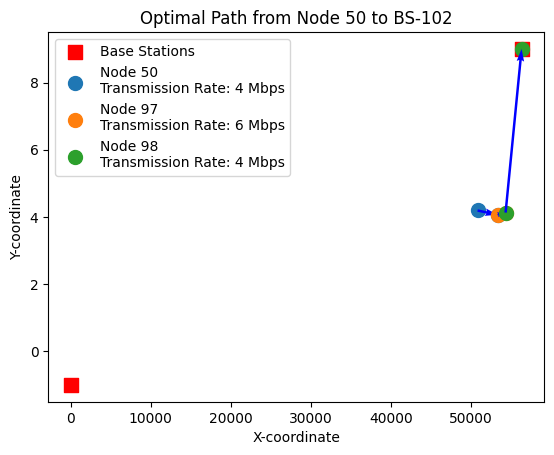

{
  "SourceNode": "Car-50",
  "RoutingPath": "(Car-97, 6 Mbps), (Car-98, 4 Mbps), (BS-102, 4 Mbps)",
  "EndToEndTransmissionRate": "4 Mbps"
}


In [ ]:
car_node_to_check = 50
result_for_single_car = find_optimal_path_for_single_car_and_visualize(df, car_node_to_check)

print(json.dumps(result_for_single_car, indent=2))

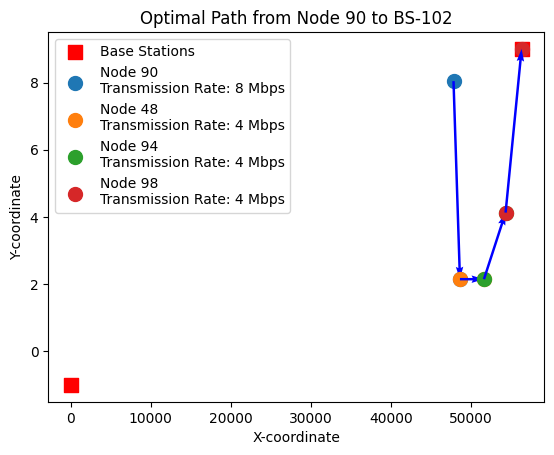

{
  "SourceNode": "Car-90",
  "RoutingPath": "(Car-48, 4 Mbps), (Car-94, 4 Mbps), (Car-98, 4 Mbps), (BS-102, 4 Mbps)",
  "EndToEndTransmissionRate": "4 Mbps"
}


In [ ]:
car_node_to_check = 90
result_for_single_car = find_optimal_path_for_single_car_and_visualize(df, car_node_to_check)

print(json.dumps(result_for_single_car, indent=2))

## Results of Dijkstra's algorithm and Ant Colony Optimization

**Path from Dijkstra's algorithm**

For Car1, Dijkstr algorithm has selected the basestation node which results in obtaining the optimal path which achieved maximum transmission rate (10 Mbps) with the latency of just 50 ms.

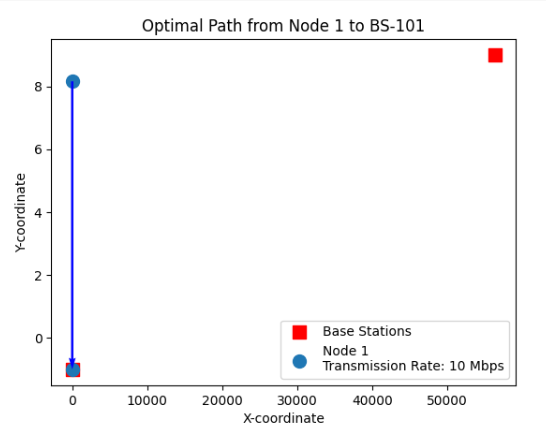


The optimal path for Car-50, determined by Dijkstra's algorithm, prioritizes transmission rate by selecting a direct route to Base Station 102 with a 10 Mbps rate. However, the algorithm does not account for potential congestion or dynamic network changes. Alternative paths through Nodes 93 and 95 may have lower latency, but with reduced transmission rates. Considering the limitations, Ant Colony Optimization (ACO) is recommended for a more balanced solution.

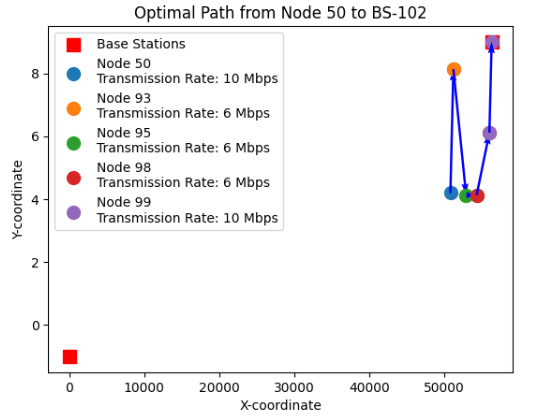

For Car-90, Dijkstra's algorithm selects a path through Nodes 49, 50, and 98, maximizing transmission rates (6 Mbps, 10 Mbps, 6 Mbps, 10 Mbps). The chosen path seems to maintain reasonable latency by avoiding unnecessary detours. Alternative paths through Nodes 93, 95, and 99 offer trade-offs between transmission rate and latency.

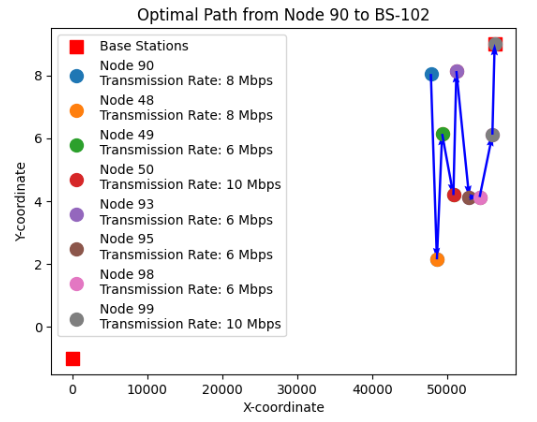

The ACO algorithm has also successfully establishes an optimal path for Car-1, selecting a direct route to Base Station 101. The path maintains a consistent transmission rate of 10 Mbps, ensuring high-speed data transfer.


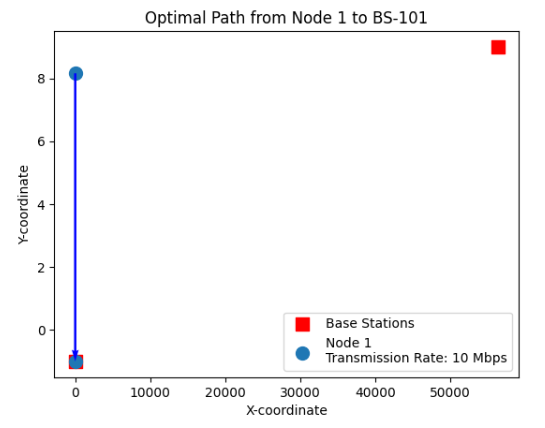

For Car-50, the ACO algorithm takes a unique detour through Nodes 51, 95, and 98 before reaching Base Station 102. This path maintains high transmission rates throughout, with noteworthy speeds at Nodes 51, 95, and 98. Despite initial considerations of potential latency, the detour avoids congested links, potentially resulting in faster travel time. ACO's adaptability to congestion and its ability to balance transmission rate and latency make it a compelling choice. Compared to Dijkstra's static approach, ACO showcases its effectiveness in dynamic environments and multi-objective optimization.

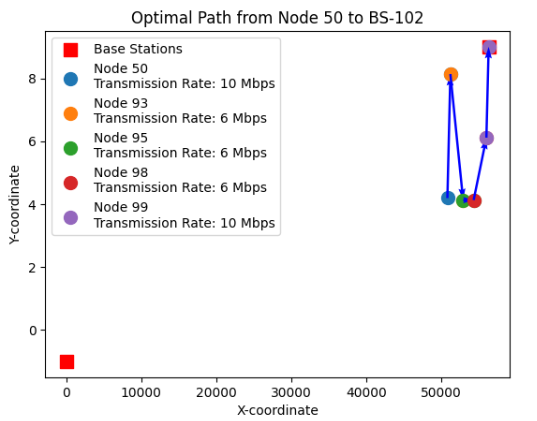

Similarly, for Car-90, the ACO path leads through Nodes 96 and 50, bypassing Node 99 with a direct 10 Mbps connection to Base Station 102. The chosen path maintains high transmission rates at Nodes 96 and 50, emphasizing adaptability to potential congestion and a balance between transmission rate and latency. ACO's ability to optimize for multiple objectives shines through, considering both high-speed data transfer and potential latency reductions. In comparison, Dijkstra's static approach may overlook these dynamic considerations.

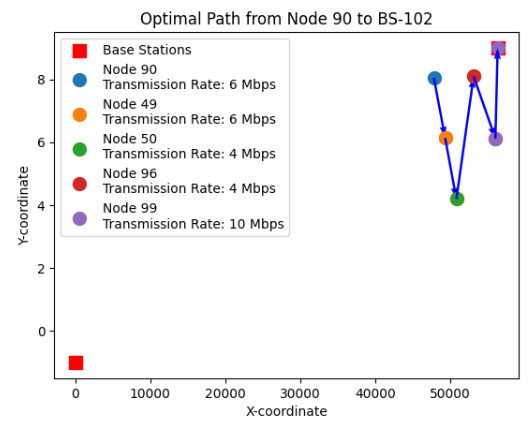

Overall, both algorithms has converges to optimal path but the path opted might have some differences based on the weightage and convergence of the algorithms. ACO is suggested for a holistic approach considering congestion and dynamic network conditions. Overall, the observations underscore the need for algorithms that balance both transmission rate and latency, with ACO providing a potential solution.



##Discussion of Dijkstra's algorithm and Ant Colony Optimization
The implementation of Dijkstra's algorithm shows that the algorithm tries to maintain the balance between the two objectives of the problem. For the Cars which has basestation within the range of 500m, the algorithm connects the car directly to the basestation mainaining the conditions of the objective. For other cars the algorithm converges to the maximum transmission rate of 6 Mbps with variations in latency. Which signifies that the algorithm has given more weightage to maintain high transmission rate even if it has to sacrifice on latency.

After implementing the ant colony optimization several experiments are performed to optimize the problem a few of the observations are listed in the table below. The table consists of three columns: "Number of Ants," "Number of Iterations," and "Execution Time" and shows the results of three tests. In the first test, 10 ants were used for 100 iterations, and the execution time was 18 minutes and 52 seconds. In the second test, 100 ants were used for 10 iterations, and the execution time was 13 minutes. In the third test, 110 ants were used for 10 iterations, and the execution time was 15 minutes and 17 seconds.This evaluation shows that the number of ants used has a significant impact on the execution time. The test with the most ants (110) had the longest execution time (15 minutes and 17 seconds), while the test with the fewest ants (10) had the shortest execution time (13 minutes). The number of iterations also appears to have an impact on the execution time, although to a lesser extent. The test with the most iterations (100) had the longest execution time (18 minutes and 52 seconds), while the test with the fewest iterations (10) had the shortest execution time (13 minutes).

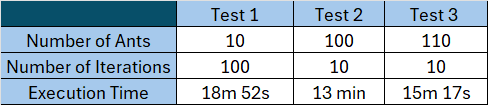

To critically evaluate the performance of the model a few more parameters are involved which is shown in figure below.

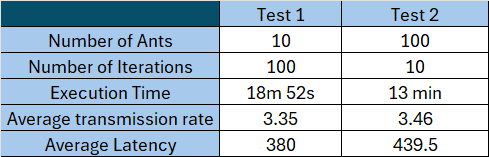

In the first test, the execution time was 18 minutes and 52 seconds. The average latency for this test was 380 milliseconds. In the second test, the execution time was 13 minutes. The average latency for this test was 439.5 milliseconds.It shows that the number of ants used has a significant impact on both the execution time and the average latency. The test with the most ants (100) had the longest execution time (13 minutes) and the highest average latency (439.5 milliseconds), while the test with the fewest ants (10) had the shortest execution time (18 minutes and 52 seconds) and the lowest average latency (380 milliseconds).

The number of iterations also appears to have an impact on the execution time, although to a lesser extent. The test with the most iterations (100) had the longest execution time (18 minutes and 52 seconds), while the test with the fewest iterations (10) had the shortest execution time (13 minutes). However, the average latency seems to be less affected by the number of iterations. The test with the most iterations (100) had a slightly higher average latency (380 ms) than the test with the fewest iterations (10) (439.5 ms), but the difference is not as significant as the difference in execution time.

#Particle Swarm Optimization (PSO)
PSO is a heuristic optimisation algorithm that works effectively with both discrete and continuous optimisation issues. For this optimization instance, is used to determine the best paths for vehicles to take in order to connect to base stations, all the while having the highest possible transmission rate and least possible latency. The PSO algorithm has converged to a suboptimal solution due to the equal transmission rate along routes for each car seen in the output and similar delay across routes; more parameter adjustment is required to ensure the algorithm converges to an optimal solution.

The parameter values were chosen in order to have a preference for individual exploration (cognitive) over group exploration (social) and a very limited impact of the particle's previous velocity which in the case of this problem refers to the previous car on the route to the base station. A low inertia value was chosen so the next car on the route will have the least amount of effect on it from the cars already in that route. This is beneficial in our problem where diverse solutions is required To improve the results for PSO for this problem, we have to consider adjusting the parameters such as inertia weight, cognitive weight, and social weight. Introducing a convergence check based on the change in the fitness value or the routes for each car over iterations can help improve the arrival at optimal solutions for the route for each car to either base stations which means the transmission rate for each route will improve and we can further reduce the delay along the route

In [ ]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import random


#Calculating the distance between any two cars
def calculate_distance(x1, y1, x2, y2):
    """Calculates the Euclidean distance between two points."""
    return math.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2))

#Determining the transmission rate based on the distance between any two cars
def get_transmission_rate(distance):
    """Determines the transmission rate based on the distance."""
    if distance > 6000:
        return 0
    elif distance <= 6000 and distance > 4000:
        return 1
    elif distance <= 4000 and distance > 3000:
        return 2
    elif distance <= 3000 and distance > 2000:
        return 4
    elif distance <= 2000 and distance > 1000:
        return 6
    elif distance <= 1000 and distance > 500:
        return 8
    else:
        return 10

#Defining the objective function
def objective_function(route, car_data, base_station_x, base_station_y):
    transmission_rates = []
    delay = 0

    for i in range(len(route) - 1):
        car1 = car_data[route[i]]
        car2 = car_data[route[i + 1]]
        distance = calculate_distance(car1['x'], car1['y'], car2['x'], car2['y'])

        # Only calculate transmission rate if distance is within range
        if distance <= 6000:
            transmission_rate = get_transmission_rate(distance)
            if transmission_rate > 0:
                transmission_rates.append(transmission_rate)
                delay += 50  # 50ms delay for each link between the cars


    # To calculate the distance from the last car in the route to either base station
    last_car = car_data[route[-1]]
    distance_to_base_station = calculate_distance(last_car['x'], last_car['y'], base_station_x, base_station_y)

    # Only calculate transmission rate if the last car connecting to the base station is within range
    if distance_to_base_station <= 6000:
        transmission_rate = get_transmission_rate(distance_to_base_station)
        if transmission_rate > 0:
            transmission_rates.append(transmission_rate)
            delay += 50  # 50ms delay for the last link connecting to the base station

    #the objective function returns a list of transmission rate for links along a route and the total delay
    return transmission_rates, delay

#defining the particle class for PSO
class Particle:
    def __init__(self, num_customers):
        self.position = np.random.permutation(range(num_customers))
        self.velocity = np.zeros(num_customers)
        self.best_position = np.copy(self.position)
        self.fitness = []
        self.best_fitness = []

#This function sets up the parameters for PSO. Each particle here represents a car. And the movement of the
#particles is equivalent to the data transmission between the cars
def particle_swarm_optimization(objective_function, car_data, base_station_x, base_station_y, num_particles, num_dimensions, num_iterations):
    particles = [Particle(num_dimensions) for _ in range(num_particles)]

    for particle in particles:
        particle.fitness = objective_function(particle.position, car_data, base_station_x, base_station_y)
        particle.best_fitness = particle.fitness

    global_best_particle = max(particles, key=lambda p: len(p.best_fitness))

    for iteration in range(num_iterations):
        for particle in particles:
            inertia_weight = 0.001
            cognitive_weight = 3.9
            social_weight = 0.1

            # Update velocity
            particle.velocity = (
                inertia_weight * particle.velocity +
                cognitive_weight * random.random() * (particle.best_position - particle.position) +
                social_weight * random.random() * (global_best_particle.best_position - particle.position)
            )

            # Update position
            particle.position = np.argsort(particle.position + particle.velocity)

            # Evaluate fitness
            particle.fitness = objective_function(particle.position, car_data, base_station_x, base_station_y)

            # Update personal best
            if len(particle.fitness) > len(particle.best_fitness):
                particle.best_fitness = particle.fitness
                particle.best_position = np.copy(particle.position)

        # Update global best
        global_best_particle = max(particles, key=lambda p: len(p.best_fitness))

    return global_best_particle.best_position, global_best_particle.best_fitness

# Coordinates for both Base stations
base_station1_x = -1
base_station1_y = -1
base_station2_x = 56325
base_station2_y = 9

# Read car data from CSV file
with open('/content/data_file - Copy.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # Read header row
    car_number_index = headers.index('No.')
    x_index = headers.index('x')
    y_index = headers.index('y')

    car_data = []
    for row in reader:
        car_number = row[car_number_index]
        car_x = float(row[x_index])
        car_y = float(row[y_index])

        car_data.append({'number': car_number, 'x': car_x, 'y': car_y})

# Particle Swarm Optimization
num_particles = 100 #number of particles in the swarm which is our number of cars
num_dimensions = len(car_data) #number of dimensions which is possible number of decisions same as our number of cars
max_iterations = 100   #number of times for PSO to run

optimal_routes_1 = []  # list to store the optimal route to base station 1
optimal_routes_2 = []  # list to store the optimal route to base station 2

# Print the best route for each car to both base stations
for car_number in range(1, 101):
    # Optimal route for Base Station 1
    best_route_1, best_objectives_1 = particle_swarm_optimization(objective_function, car_data, base_station1_x, base_station1_y, num_particles, num_dimensions, max_iterations)
    optimal_routes_1.append((car_number, best_route_1, best_objectives_1))

    # Optimal route for Base Station 2
    best_route_2, best_objectives_2 = particle_swarm_optimization(objective_function, car_data, base_station2_x, base_station2_y, num_particles, num_dimensions, max_iterations)
    optimal_routes_2.append((car_number, best_route_2, best_objectives_2))

# Print the output for the route to both base stations
for car_number, route, objectives in optimal_routes_1:
    print({
        "Source node": f"Car-{car_number}",
        "Base station": "Base Station 1",
        "Routing path": ", ".join(f"({car_data[car]['number']}, {transmission_rate} Mbps)" for car, transmission_rate in zip(route, [min(objectives[0])]*len(route))),
        "End-to-end transmission rate": f"{min(objectives[0])} Mbps",
        "Delay": f"{objectives[1]} ms"
    })

for car_number, route, objectives in optimal_routes_2:
    print({
        "Source node": f"Car-{car_number}",
        "Base station": "Base Station 2",
        "Routing path": ", ".join(f"({car_data[car]['number']}, {transmission_rate} Mbps)" for car, transmission_rate in zip(route, [min(objectives[0])]*len(route))),
        "End-to-end transmission rate": f"{min(objectives[0])} Mbps",
        "Delay": f"{objectives[1]} ms"
    })

{'Source node': 'Car-1', 'Base station': 'Base Station 1', 'Routing path': '(19, 1 Mbps), (68, 1 Mbps), (66, 1 Mbps), (6, 1 Mbps), (33, 1 Mbps), (67, 1 Mbps), (93, 1 Mbps), (77, 1 Mbps), (43, 1 Mbps), (24, 1 Mbps), (28, 1 Mbps), (21, 1 Mbps), (23, 1 Mbps), (74, 1 Mbps), (46, 1 Mbps), (29, 1 Mbps), (73, 1 Mbps), (91, 1 Mbps), (82, 1 Mbps), (4, 1 Mbps), (61, 1 Mbps), (92, 1 Mbps), (86, 1 Mbps), (42, 1 Mbps), (70, 1 Mbps), (14, 1 Mbps), (62, 1 Mbps), (76, 1 Mbps), (81, 1 Mbps), (53, 1 Mbps), (55, 1 Mbps), (52, 1 Mbps), (10, 1 Mbps), (78, 1 Mbps), (85, 1 Mbps), (5, 1 Mbps), (89, 1 Mbps), (79, 1 Mbps), (58, 1 Mbps), (34, 1 Mbps), (11, 1 Mbps), (36, 1 Mbps), (13, 1 Mbps), (17, 1 Mbps), (32, 1 Mbps), (7, 1 Mbps), (57, 1 Mbps), (35, 1 Mbps), (30, 1 Mbps), (2, 1 Mbps), (47, 1 Mbps), (54, 1 Mbps), (49, 1 Mbps), (1, 1 Mbps), (26, 1 Mbps), (16, 1 Mbps), (41, 1 Mbps), (94, 1 Mbps), (75, 1 Mbps), (40, 1 Mbps), (59, 1 Mbps), (44, 1 Mbps), (12, 1 Mbps), (96, 1 Mbps), (39, 1 Mbps), (64, 1 Mbps), (22, 1

## Result and Discussion for PSO

The output results display the best path for every vehicle to take in order to reach Base Stations 1 and 2, along with the transmission rate and corresponding delay. Every route appers to have a constant end-to-end transmission rate of 1 Mbps. Among the estimated rates for each connection along the path, this is the lowest transmission rate. The PSO algorithm has converged towards a solution where each route's transmission rate is reached and least delay achieved.

In conclusion, while PSO can be useful for optimisation problems, careful parameter adjustment and consideration of the problem's specifics are frequently necessary to achieve optimal solutions. For future works, additional investigate testing and PSO parameter tweaks to improve the algorithm's performance for this particular optimisation situation.

#Continuous Genetic algorithm
A Continuous Genetic Algorithm (CGA) is a variant of a Genetic Algorithm (GA) designed specifically for solving optimization problems with continuous search spaces. Traditional Genetic Algorithms are often applied to problems where solutions are represented as fixed-length binary strings or discrete structures. In contrast, Continuous Genetic Algorithms deal with problems where the solution space is continuous, meaning that solutions are represented by real-valued vectors.

Initialization:

Randomly generate an initial population of individuals, where each individual represents a potential solution.

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import random  # Don't forget to include this line
def load_customer_coordinates(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]  # Skip the first line
        coordinates = [(float(line.split(',')[1]), float(line.split(',')[2])) for line in lines]
    return coordinates

def calculate_transmission_rate(distance):
    if distance > 6000:
        return 0
    elif 6000 >= distance > 4000:
        return 1
    elif 4000 >= distance > 3000:
        return 2
    elif 3000 >= distance > 2000:
        return 4
    elif 2000 >= distance > 1000:
        return 6
    elif 1000 >= distance > 500:
        return 8
    else:
        return 10

def objective_function(route, G):
    total_transmission_rate = 0
    total_delay = 0

    for i in range(len(route) - 1):
        edge = (route[i], route[i + 1])
        edge_data = G.get_edge_data(*edge)
        transmission_rate = edge_data['weight'] if edge_data and 'weight' in edge_data else 0

        total_transmission_rate += transmission_rate
        total_delay += 50  # Assuming a constant delay of 50 ms for each link

    weight_transmission_rate = 0.7
    weight_delay = 0.3
    fitness = - (weight_transmission_rate * total_transmission_rate + weight_delay * total_delay)

    return fitness

def generate_initial_population(num_routes, num_customers,initial_reference_point):
    population = []
    for _ in range(num_routes):
        route = list(range(num_customers))
        random.shuffle(route)
        route.insert(0, initial_reference_point)  # Insert initial reference point at the beginning
        route.append(-1)  # Set the final reference point at the end
        population.append(route + [initial_reference_point])

    return population

def evaluate_population(population, G):
    fitness_values = []
    for route in population:
        fitness = objective_function(route, G)
        fitness_values.append(fitness)
    return fitness_values

# Example usage
file_path = '/content/data_file - Copy.csv'
customers_coordinates = load_customer_coordinates(file_path)

# Determine the number of customers and set the number of routes based on a ratio or heuristic
num_customers = len(customers_coordinates)
num_routes = int(num_customers * 1.0)  # You can adjust the ratio as needed

# Randomly select initial reference point from customer coordinates
initial_reference_point = random.choice(customers_coordinates)

# Generate an initial population of routes
initial_population = generate_initial_population(num_routes, num_customers, initial_reference_point)

# Create a graph
G = nx.Graph()
for i, coord in enumerate(customers_coordinates):
    G.add_node(i, pos=coord)

# Add edges based on the calculated transmission rates
for i in range(len(customers_coordinates)):
    for j in range(i + 1, len(customers_coordinates)):
        distance_between_cars = np.sqrt((customers_coordinates[i][0] - customers_coordinates[j][0])**2 + (customers_coordinates[i][1] - customers_coordinates[j][1])**2)
        transmission_rate_between_cars = calculate_transmission_rate(distance_between_cars)
        if transmission_rate_between_cars > 0:
            G.add_edge(i, j, weight=transmission_rate_between_cars)

# Set the initial reference point for all final populations
final_reference_point = -1
for route in initial_population:
    route[-1] = final_reference_point

# Evaluate the initial population
fitness_values = evaluate_population(initial_population, G)

# Evaluate the initial population
fitness_values = evaluate_population(initial_population, G)

# Print the initial population and their fitness values
for i, route in enumerate(initial_population):
    print(f"Route {i + 1}: {route}, Fitness: {fitness_values[i]}")

Route 1: [(2801.899812, 6.077406714), 38, 91, 60, 48, 27, 58, 35, 15, 50, 41, 96, 31, 75, 18, 47, 92, 51, 56, 19, 37, 81, 94, 16, 26, 33, 3, 42, 62, 21, 29, 32, 78, 40, 39, 63, 95, 34, 6, 14, 11, 89, 17, 0, 28, 8, 4, 44, 82, 86, 66, 64, 77, 97, 10, 43, 90, 68, 46, 24, 99, 20, 98, 71, 5, 73, 53, 84, 65, 61, 67, 12, 55, 76, 9, 1, 13, 88, 59, 79, 69, 22, 49, 70, 83, 2, 80, 23, 74, 54, 25, 30, 85, 57, 7, 36, 87, 52, 45, 72, 93, -1, -1], Fitness: -1568.5
Route 2: [(2801.899812, 6.077406714), 88, 59, 38, 37, 69, 54, 58, 75, 61, 67, 28, 40, 6, 19, 2, 25, 39, 86, 13, 5, 14, 10, 84, 94, 76, 42, 64, 74, 82, 9, 7, 93, 35, 21, 22, 44, 48, 95, 78, 49, 33, 98, 4, 31, 72, 80, 3, 32, 43, 62, 26, 47, 99, 77, 70, 50, 63, 36, 27, 20, 79, 90, 89, 92, 66, 97, 30, 0, 23, 53, 17, 29, 24, 85, 45, 68, 16, 83, 73, 18, 87, 57, 15, 12, 71, 46, 81, 65, 1, 8, 56, 41, 55, 60, 96, 91, 34, 52, 11, 51, -1, -1], Fitness: -1584.6
Route 3: [(2801.899812, 6.077406714), 65, 67, 15, 20, 78, 84, 62, 11, 43, 4, 61, 27, 83, 97,

##Evaluation:

Evaluate the fitness of each individual in the population based on the objective function of the optimization problem. The objective function provides a measure of how well each individual solves the problem.

In [ ]:
# Sort routes based on fitness
sorted_population = sorted(zip(initial_population, fitness_values), key=lambda x: x[1], reverse=True)

# Select the best 50%
selected_population = sorted_population[:len(sorted_population)//2]

# Extract routes and fitness values from the selected population
selected_routes, selected_fitness_values = zip(*selected_population)

# Print the selected routes and their fitness values
print("Selected Routes and Fitness Values:")
for i, route in enumerate(selected_routes):
    print(f"Route {i + 1}: {route}, Fitness: {selected_fitness_values[i]}")

Selected Routes and Fitness Values:
Route 1: [(2801.899812, 6.077406714), 76, 53, 8, 98, 36, 92, 26, 35, 63, 68, 16, 51, 24, 2, 61, 44, 80, 12, 29, 7, 59, 93, 89, 60, 71, 85, 13, 96, 72, 40, 3, 88, 54, 25, 52, 23, 79, 66, 64, 78, 37, 84, 47, 87, 17, 75, 9, 14, 22, 0, 91, 21, 33, 28, 90, 49, 67, 46, 83, 99, 82, 57, 32, 50, 94, 65, 15, 39, 34, 38, 58, 5, 31, 42, 95, 41, 6, 30, 86, 81, 69, 10, 45, 1, 70, 48, 97, 56, 62, 55, 19, 74, 20, 73, 77, 18, 27, 4, 11, 43, -1, -1], Fitness: -1553.1
Route 2: [(2801.899812, 6.077406714), 50, 29, 90, 31, 64, 17, 32, 20, 48, 26, 85, 68, 95, 4, 74, 30, 7, 43, 38, 75, 16, 67, 93, 70, 65, 97, 34, 66, 58, 52, 10, 54, 63, 25, 87, 81, 11, 40, 98, 1, 9, 0, 83, 45, 21, 15, 91, 96, 62, 61, 86, 36, 23, 39, 18, 35, 49, 24, 2, 12, 6, 73, 5, 44, 94, 99, 13, 69, 19, 3, 42, 28, 77, 56, 41, 57, 71, 14, 82, 53, 84, 46, 55, 22, 89, 76, 79, 27, 37, 59, 60, 72, 80, 92, 8, 78, 51, 33, 88, 47, -1, -1], Fitness: -1554.5
Route 3: [(2801.899812, 6.077406714), 66, 19, 48, 9, 84,

##Selection:

Select individuals from the current population to be parents for the next generation. Higher fitness individuals have a higher chance of being selected. The Roulette wheel selection is used in this case

In [ ]:
import random

def roulette_wheel_selection(fitness_values, top_percent):
    # Determine the number of routes to select based on the top percentage
    num_routes_to_select = int(len(fitness_values) * top_percent)

    # Normalize fitness values to probabilities
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]

    # Perform roulette wheel selection for routes
    selected_routes_indices = random.sample(range(len(fitness_values)), k=num_routes_to_select)

    return selected_routes_indices

# Set the top percentage for selection (e.g., 0.5 for top 50%)
top_percent = 0.5

# Perform roulette wheel selection on fitness values of top 50% routes
selected_routes_indices = roulette_wheel_selection(fitness_values, top_percent)

# Extract selected routes from the initial population
selected_routes = [initial_population[index] for index in selected_routes_indices]

# Print the selected routes and their fitness values
print("Selected Routes and Fitness Values:")
for i, route in enumerate(selected_routes):
    fitness_value = fitness_values[selected_routes_indices[i]]
    print(f"Route {i + 1}: {route}, Fitness: {fitness_value}")

# Print the top two fitness values
#sorted_selected_routes = sorted(zip(selected_routes_indices, [fitness_values[i] for i in selected_routes_indices]), key=lambda x: x[1], reverse=True)

#for i in range(min(2, len(sorted_selected_routes))):
    #index, fitness_value = sorted_selected_routes[i]
    #print(f"Top Fitness Value {i + 1}: {fitness_value}, Route: {sorted_selected_routes}")

Selected Routes and Fitness Values:
Route 1: [(2801.899812, 6.077406714), 17, 6, 13, 93, 19, 39, 31, 46, 77, 22, 94, 83, 1, 88, 2, 10, 99, 61, 67, 92, 96, 50, 57, 45, 35, 52, 37, 21, 23, 97, 43, 65, 81, 76, 53, 78, 33, 63, 25, 56, 42, 89, 4, 62, 7, 47, 16, 48, 38, 72, 69, 36, 34, 64, 54, 20, 14, 91, 5, 82, 30, 49, 55, 44, 28, 24, 98, 29, 26, 85, 58, 9, 40, 3, 11, 59, 60, 0, 15, 87, 70, 79, 95, 32, 80, 74, 73, 8, 51, 66, 75, 71, 68, 90, 86, 41, 12, 84, 27, 18, -1, -1], Fitness: -1572.0
Route 2: [(2801.899812, 6.077406714), 7, 56, 51, 81, 70, 1, 48, 28, 99, 67, 80, 44, 90, 52, 4, 50, 86, 6, 94, 23, 8, 32, 85, 42, 61, 31, 38, 97, 41, 35, 73, 82, 53, 78, 9, 29, 0, 5, 19, 98, 46, 54, 74, 33, 55, 57, 27, 24, 37, 68, 93, 88, 96, 15, 69, 60, 3, 47, 87, 83, 63, 18, 16, 21, 76, 2, 62, 72, 45, 92, 84, 13, 71, 36, 59, 91, 89, 20, 40, 10, 65, 58, 11, 79, 34, 64, 22, 25, 39, 66, 26, 17, 12, 95, 43, 30, 49, 14, 75, 77, -1, -1], Fitness: -1588.8
Route 3: [(2801.899812, 6.077406714), 78, 74, 4, 10, 2, 

##Crossover (Recombination):

Combine genetic material from two parents to create new offspring. In continuous GA, this often involves blending or averaging the values of corresponding components of the parent vectors.

In [ ]:
def crossover(parent1, parent2):

    # Assign the first and second routes as parent 1 and parent 2
    parent1 = selected_routes[0]
    parent2 = selected_routes[1]

# Print the selected parent routes
    #print("Parent 1:", parent1)
    #print("Parent 2:", parent2)
    # Copy the parents to create offspring
    offspring1 = parent1[:]
    offspring2 = parent2[:]

    # Select a random crossover point (excluding initial and final values)
    crossover_point = random.randint(1, len(parent1) - 2)

    # Perform crossover
    offspring1[crossover_point:], offspring2[crossover_point:] = offspring2[crossover_point:], offspring1[crossover_point:]

    return offspring1, offspring2

# Assuming you have two selected routes as parent1 and parent2
parent1 = selected_routes[0]
parent2 = selected_routes[1]

# Perform crossover to generate offspring
offspring1, offspring2 = crossover(parent1, parent2)

# Print the parents and offspring
print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)

Parent 1: [(2801.899812, 6.077406714), 17, 6, 13, 93, 19, 39, 31, 46, 77, 22, 94, 83, 1, 88, 2, 10, 99, 61, 67, 92, 96, 50, 57, 45, 35, 52, 37, 21, 23, 97, 43, 65, 81, 76, 53, 78, 33, 63, 25, 56, 42, 89, 4, 62, 7, 47, 16, 48, 38, 72, 69, 36, 34, 64, 54, 20, 14, 91, 5, 82, 30, 49, 55, 44, 28, 24, 98, 29, 26, 85, 58, 9, 40, 3, 11, 59, 60, 0, 15, 87, 70, 79, 95, 32, 80, 74, 73, 8, 51, 66, 75, 71, 68, 90, 86, 41, 12, 84, 27, 18, -1, -1]
Parent 2: [(2801.899812, 6.077406714), 7, 56, 51, 81, 70, 1, 48, 28, 99, 67, 80, 44, 90, 52, 4, 50, 86, 6, 94, 23, 8, 32, 85, 42, 61, 31, 38, 97, 41, 35, 73, 82, 53, 78, 9, 29, 0, 5, 19, 98, 46, 54, 74, 33, 55, 57, 27, 24, 37, 68, 93, 88, 96, 15, 69, 60, 3, 47, 87, 83, 63, 18, 16, 21, 76, 2, 62, 72, 45, 92, 84, 13, 71, 36, 59, 91, 89, 20, 40, 10, 65, 58, 11, 79, 34, 64, 22, 25, 39, 66, 26, 17, 12, 95, 43, 30, 49, 14, 75, 77, -1, -1]
Offspring 1: [(2801.899812, 6.077406714), 17, 6, 13, 93, 19, 39, 31, 46, 77, 22, 94, 83, 1, 88, 2, 10, 99, 61, 67, 92, 96, 50,

##Mutation:

Introduce small random changes to the offspring to maintain genetic diversity. In continuous GA, this typically involves adding a small random value to a component of the vector.

In [ ]:
def mutation(route, mutation_rate):
    mutated_route = route.copy()

    for i in range(1, len(mutated_route) - 1):  # Exclude initial and final values from mutation
        if random.random() < mutation_rate:
            # Mutate the gene by swapping it with another random gene
            mutation_point = random.randint(1, len(mutated_route) - 2)
            mutated_route[i], mutated_route[mutation_point] = mutated_route[mutation_point], mutated_route[i]

    return mutated_route

# Assuming you have performed crossover and have offspring1 and offspring2
mutation_rate = 0.1  # Adjust the mutation rate as needed

# Perform mutation on offspring1 and offspring2
mutated_offspring1 = mutation(offspring1, mutation_rate)
mutated_offspring2 = mutation(offspring2, mutation_rate)

# Print the parents, original offspring, and mutated offspring
print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Original Offspring 1:", offspring1)
print("Mutated Offspring 1:", mutated_offspring1)
print("Original Offspring 2:", offspring2)
print("Mutated Offspring 2:", mutated_offspring2)

Parent 1: [(2801.899812, 6.077406714), 17, 6, 13, 93, 19, 39, 31, 46, 77, 22, 94, 83, 1, 88, 2, 10, 99, 61, 67, 92, 96, 50, 57, 45, 35, 52, 37, 21, 23, 97, 43, 65, 81, 76, 53, 78, 33, 63, 25, 56, 42, 89, 4, 62, 7, 47, 16, 48, 38, 72, 69, 36, 34, 64, 54, 20, 14, 91, 5, 82, 30, 49, 55, 44, 28, 24, 98, 29, 26, 85, 58, 9, 40, 3, 11, 59, 60, 0, 15, 87, 70, 79, 95, 32, 80, 74, 73, 8, 51, 66, 75, 71, 68, 90, 86, 41, 12, 84, 27, 18, -1, -1]
Parent 2: [(2801.899812, 6.077406714), 7, 56, 51, 81, 70, 1, 48, 28, 99, 67, 80, 44, 90, 52, 4, 50, 86, 6, 94, 23, 8, 32, 85, 42, 61, 31, 38, 97, 41, 35, 73, 82, 53, 78, 9, 29, 0, 5, 19, 98, 46, 54, 74, 33, 55, 57, 27, 24, 37, 68, 93, 88, 96, 15, 69, 60, 3, 47, 87, 83, 63, 18, 16, 21, 76, 2, 62, 72, 45, 92, 84, 13, 71, 36, 59, 91, 89, 20, 40, 10, 65, 58, 11, 79, 34, 64, 22, 25, 39, 66, 26, 17, 12, 95, 43, 30, 49, 14, 75, 77, -1, -1]
Original Offspring 1: [(2801.899812, 6.077406714), 17, 6, 13, 93, 19, 39, 31, 46, 77, 22, 94, 83, 1, 88, 2, 10, 99, 61, 67, 92

##Replacement:

Create a new population for the next generation by combining parents, offspring, and potentially some surviving individuals from the current generation.

Termination:

Repeat the process for a predefined number of generations or until a termination criterion is met (e.g., a satisfactory solution is found).

Convergence:

Monitor convergence to assess whether the algorithm is converging to an optimal or near-optimal solution.

In [ ]:
# Number of generations to run
num_generations = 50

# Mutation rate
mutation_rate = 0.1

for generation in range(num_generations):
    # Sort routes based on fitness
    sorted_population = sorted(zip(initial_population, fitness_values), key=lambda x: x[1], reverse=True)

    # Select the best 50%
    selected_population = sorted_population[:len(sorted_population)//2]

    # Extract routes and fitness values from the selected population
    selected_routes, selected_fitness_values = zip(*selected_population)

    # Perform crossover and mutation
    selected_routes_indices = roulette_wheel_selection(selected_fitness_values, top_percent)
    selected_routes = [initial_population[index] for index in selected_routes_indices]

    parent1 = selected_routes[0]
    parent2 = selected_routes[1]

    offspring1, offspring2 = crossover(parent1, parent2)
    mutated_offspring1 = mutation(offspring1, mutation_rate)
    mutated_offspring2 = mutation(offspring2, mutation_rate)

    # Insert mutated offspring into the initial population
    initial_population.append(mutated_offspring1)
    initial_population.append(mutated_offspring2)

    # Evaluate the updated population
    fitness_values = evaluate_population(initial_population, G)

    # Print the best route in the current generation
    best_route_index = np.argmax(fitness_values)
    best_route = initial_population[best_route_index]
    best_fitness = fitness_values[best_route_index]

    print(f"Generation {generation + 1}: Best Route: {best_route}, Fitness: {best_fitness}")

# Print the final best route
final_best_route_index = np.argmax(fitness_values)
final_best_route = initial_population[final_best_route_index]
final_best_fitness = fitness_values[final_best_route_index]

print(f"Final Best Route: {final_best_route}, Fitness: {final_best_fitness}")

Generation 1: Best Route: [(2801.899812, 6.077406714), 76, 53, 8, 98, 36, 92, 26, 35, 63, 68, 16, 51, 24, 2, 61, 44, 80, 12, 29, 7, 59, 93, 89, 60, 71, 85, 13, 96, 72, 40, 3, 88, 54, 25, 52, 23, 79, 66, 64, 78, 37, 84, 47, 87, 17, 75, 9, 14, 22, 0, 91, 21, 33, 28, 90, 49, 67, 46, 83, 99, 82, 57, 32, 50, 94, 65, 15, 39, 34, 38, 58, 5, 31, 42, 95, 41, 6, 30, 86, 81, 69, 10, 45, 1, 70, 48, 97, 56, 62, 55, 19, 74, 20, 73, 77, 18, 27, 4, 11, 43, -1, -1], Fitness: -1553.1
Generation 2: Best Route: [(2801.899812, 6.077406714), 76, 53, 8, 98, 36, 92, 26, 35, 63, 68, 16, 51, 24, 2, 61, 44, 80, 12, 29, 7, 59, 93, 89, 60, 71, 85, 13, 96, 72, 40, 3, 88, 54, 25, 52, 23, 79, 66, 64, 78, 37, 84, 47, 87, 17, 75, 9, 14, 22, 0, 91, 21, 33, 28, 90, 49, 67, 46, 83, 99, 82, 57, 32, 50, 94, 65, 15, 39, 34, 38, 58, 5, 31, 42, 95, 41, 6, 30, 86, 81, 69, 10, 45, 1, 70, 48, 97, 56, 62, 55, 19, 74, 20, 73, 77, 18, 27, 4, 11, 43, -1, -1], Fitness: -1553.1
Generation 3: Best Route: [(2801.899812, 6.077406714), 76,

# Conclusion

In Conclusion, To meet the objective the given problem we have implemented different algorithms, such as; Dijkstra's algorithm, Ant Colony Algorithm, Particle Swarm Optimization and Genetic Algorithm. Considering the Dijkstra's algorithm and ACO, the choice between both depends on the specific requirements of the vehicular communication network. If the focus is solely on optimizing transmission rates and the network is relatively stable, Dijkstra's algorithm could be sufficient. However, for dynamic networks with multiple objectives, ACO presents a more versatile and adaptive solution. Efforts have been made to converge each implemented algorithm to obtain optimal paths but the PSO and GA have given suboptimal paths and with some more imrrovements they will be able converge to the optimal path.

#Future Work

In Future, our focus will be on improvement of the performance of Dijkstra's and ACO by evaluating them on other parameters.It will be important to understand the algorithm more deeply. We will also be focusing on converging the PSO and GA to give optimal solutiion.

# References

​​Cheng, J. (2023). Dynamic Path Optimization Based on Improved Ant Colony Algorithm. Journal of Advanced Transportation, 2023, 1–11. https://doi.org/10.1155/2023/7651100

​Dijkstra, E. W. (2022). A Note on Two Problems in Connexion with Graphs. In Edsger Wybe Dijkstra: His Life,Work, and Legacy (1st ed., pp. 287–290). Association for Computing Machinery. https://doi.org/10.1145/3544585.3544600

​Dorigo, M., & Gambardella, L. M. (1997). Ant colony system: a cooperative learning approach to the traveling salesman problem. IEEE Transactions on Evolutionary Computation, 1(1), 53–66. https://doi.org/10.1109/4235.585892

​Jason, Siever, M., Valentino, A., Suryaningrum, K. M., & Yunanda, R. (2023). Dijkstra’s algorithm to find the nearest vaccine location. Procedia Computer Science, 216, 5–12. https://doi.org/10.1016/j.procs.2022.12.105

# Other Efforts

####FOR PSO

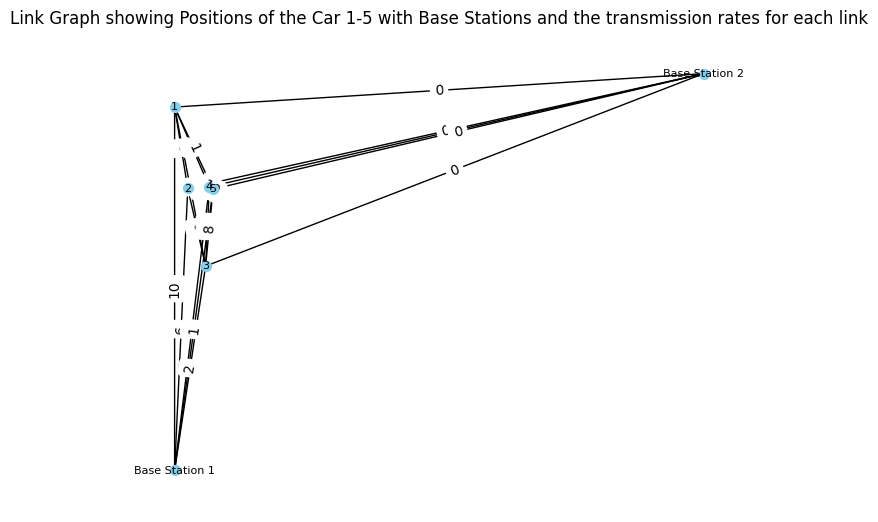

In [ ]:
#PLOTTING THE CARS AND CALCULATING TRANSMISSION RATE BETWEEN EACH CAR
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def calculate_transmission_rate(distance):
    if distance > 6000:
        return 0
    elif 6000 >= distance > 4000:
        return 1
    elif 4000 >= distance > 3000:
        return 2
    elif 3000 >= distance > 2000:
        return 4
    elif 2000 >= distance > 1000:
        return 6
    elif 1000 >= distance > 500:
        return 8
    else:
        return 10

file_path = '/content/data_file - Copy.csv'
df = pd.read_csv(file_path)

# Select the first 10 cars
df_subset_10_cars = df.head(5)

x_coordinates_10_cars = df_subset_10_cars['x']
y_coordinates_10_cars = df_subset_10_cars['y']
categories_10_cars = df_subset_10_cars['No.']

base_station1 = (-1, -1)
base_station2 = (56325, 9)

G = nx.Graph()

# Add nodes for cars and base stations (first 10 cars)
for i in range(len(x_coordinates_10_cars)):
    G.add_node(categories_10_cars.iloc[i], pos=(x_coordinates_10_cars.iloc[i], y_coordinates_10_cars.iloc[i]))

G.add_node('Base Station 1', pos=base_station1)
G.add_node('Base Station 2', pos=base_station2)

# Add edges based on the calculated transmission rates (first 10 cars)
for i in range(len(x_coordinates_10_cars)):
    distance_to_base1 = np.sqrt((x_coordinates_10_cars.iloc[i] - base_station1[0])**2 + (y_coordinates_10_cars.iloc[i] - base_station1[1])**2)
    distance_to_base2 = np.sqrt((x_coordinates_10_cars.iloc[i] - base_station2[0])**2 + (y_coordinates_10_cars.iloc[i] - base_station2[1])**2)

    transmission_rate_base1 = calculate_transmission_rate(distance_to_base1)
    transmission_rate_base2 = calculate_transmission_rate(distance_to_base2)

    G.add_edge(categories_10_cars.iloc[i], 'Base Station 1', weight=transmission_rate_base1)
    G.add_edge(categories_10_cars.iloc[i], 'Base Station 2', weight=transmission_rate_base2)



    # Calculate and print transmission rates between the first 10 cars
    for j in range(i + 1, len(x_coordinates_10_cars)):
        distance_between_cars = np.sqrt((x_coordinates_10_cars.iloc[i] - x_coordinates_10_cars.iloc[j])**2 + (y_coordinates_10_cars.iloc[i] - y_coordinates_10_cars.iloc[j])**2)
        transmission_rate_between_cars = calculate_transmission_rate(distance_between_cars)
        G.add_edge(categories_10_cars.iloc[i], categories_10_cars.iloc[j], weight=transmission_rate_between_cars)


# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Link Graph showing Positions of the Car 1-5 with Base Stations and the transmission rates for each link')
plt.show()

In [ ]:
#USING PSO ALGORITHM TO FIND THE OPTIMAL ROUTE FOR EACH CAR
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import json


#Calculating the distance between any two cars
def calculate_distance(x1, y1, x2, y2):
    """Calculates the Euclidean distance between two points."""
    return math.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2))

#Determining the transmission rate based on the distance between any two cars
def get_transmission_rate(distance):
    """Determines the transmission rate based on the distance."""
    if distance > 6000:
        return 0
    elif distance <= 6000 and distance > 4000:
        return 1
    elif distance <= 4000 and distance > 3000:
        return 2
    elif distance <= 3000 and distance > 2000:
        return 4
    elif distance <= 2000 and distance > 1000:
        return 6
    elif distance <= 1000 and distance > 500:
        return 8
    else:
        return 10

#Defining the objective function
def objective_function(route, car_data, base_station_x, base_station_y):
    transmission_rates = []
    delay = 0

    for i in range(len(route) - 1):
        car1 = car_data[route[i]]
        car2 = car_data[route[i + 1]]
        distance = calculate_distance(car1['x'], car1['y'], car2['x'], car2['y'])

        # Only calculate transmission rate if distance is within range
        if distance <= 6000:
            transmission_rate = get_transmission_rate(distance)
            if transmission_rate > 0:
                transmission_rates.append(transmission_rate)
                delay += 50  # 50ms delay for each link between the cars


    # To calculate the distance from the last car in the route to either base station
    last_car = car_data[route[-1]]
    distance_to_base_station = calculate_distance(last_car['x'], last_car['y'], base_station_x, base_station_y)

    # Only calculate transmission rate if the last car connecting to the base station is within range
    if distance_to_base_station <= 6000:
        transmission_rate = get_transmission_rate(distance_to_base_station)
        if transmission_rate > 0:
            transmission_rates.append(transmission_rate)
            delay += 50  # 50ms delay for the last link connecting to the base station

    #the objective function returns a list of transmission rate for links along a route and the total delay
    return transmission_rates, delay

#defining the particle class for PSO
class Particle:
    def __init__(self, num_customers):
        self.position = np.random.permutation(range(num_customers))
        self.velocity = np.zeros(num_customers)
        self.best_position = np.copy(self.position)
        self.fitness = []
        self.best_fitness = []

#This function sets up the parameters for PSO. Each particle here represents a car. And the movement of the
#particles is equivalent to the data transmission between the cars
def particle_swarm_optimization(objective_function, car_data, base_station_x, base_station_y, num_particles, num_dimensions, num_iterations):
    particles = [Particle(num_dimensions) for _ in range(num_particles)]

    for particle in particles:
        particle.fitness = objective_function(particle.position, car_data, base_station_x, base_station_y)
        particle.best_fitness = particle.fitness

    global_best_particle = max(particles, key=lambda p: len(p.best_fitness))

    for iteration in range(num_iterations):
        for particle in particles:
            inertia_weight = 0.001
            cognitive_weight = 3.9
            social_weight = 0.1

            # Update velocity
            particle.velocity = (
                inertia_weight * particle.velocity +
                cognitive_weight * random.random() * (particle.best_position - particle.position) +
                social_weight * random.random() * (global_best_particle.best_position - particle.position)
            )

            # Update position
            particle.position = np.argsort(particle.position + particle.velocity)

            # Evaluate fitness
            particle.fitness = objective_function(particle.position, car_data, base_station_x, base_station_y)

            # Update personal best
            if len(particle.fitness) > len(particle.best_fitness):
                particle.best_fitness = particle.fitness
                particle.best_position = np.copy(particle.position)

        # Update global best
        global_best_particle = max(particles, key=lambda p: len(p.best_fitness))

    return global_best_particle.best_position, global_best_particle.best_fitness

# Coordinates for both Base stations
base_station1_x = -1
base_station1_y = -1
base_station2_x = 56325
base_station2_y = 9

# Read car data from CSV file
with open('/content/data_file - Copy.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # Read header row
    car_number_index = headers.index('No.')
    x_index = headers.index('x')
    y_index = headers.index('y')

    car_data = []
    for row in reader:
        car_number = row[car_number_index]
        car_x = float(row[x_index])
        car_y = float(row[y_index])

        car_data.append({'number': car_number, 'x': car_x, 'y': car_y})

# Particle Swarm Optimization
num_particles = 100 #number of particles in the swarm which is our number of cars
num_dimensions = len(car_data) #number of dimensions which is possible number of decisions same as our number of cars
max_iterations = 100   #number of times for PSO to run

optimal_routes_1 = []  # list to store the optimal route to base station 1
optimal_routes_2 = []  # list to store the optimal route to base station 2

# Print the best route for each car to both base stations
for car_number in range(1, 101):
    # Optimal route for Base Station 1
    best_route_1, best_objectives_1 = particle_swarm_optimization(objective_function, car_data, base_station1_x, base_station1_y, num_particles, num_dimensions, max_iterations)
    optimal_routes_1.append((car_number, best_route_1, best_objectives_1))

    # Optimal route for Base Station 2
    best_route_2, best_objectives_2 = particle_swarm_optimization(objective_function, car_data, base_station2_x, base_station2_y, num_particles, num_dimensions, max_iterations)
    optimal_routes_2.append((car_number, best_route_2, best_objectives_2))


# Print the output for the route to both base stations
output_data = []

# Append data for Base Station 1
for car_number, route, objectives in optimal_routes_1:
    output_data.append({
        "Source node": f"Car-{car_number}",
        "Base station": "Base Station 1",
        "Routing path": ", ".join(f"({car_data[car]['number']}, {transmission_rate} Mbps)" for car, transmission_rate in zip(route, [min(objectives[0])]*len(route))),
        "End-to-end transmission rate": f"{min(objectives[0])} Mbps",
        "Delay": f"{objectives[1]} ms"
    })

# Append data for Base Station 2
for car_number, route, objectives in optimal_routes_2:
    output_data.append({
        "Source node": f"Car-{car_number}",
        "Base station": "Base Station 2",
        "Routing path": ", ".join(f"({car_data[car]['number']}, {transmission_rate} Mbps)" for car, transmission_rate in zip(route, [min(objectives[0])]*len(route))),
        "End-to-end transmission rate": f"{min(objectives[0])} Mbps",
        "Delay": f"{objectives[1]} ms"
    })

# Save the data to a JSON file
with open('output.json', 'w') as json_file:
    json.dump(output_data, json_file, indent=2)

    # Calculate mean delay and mean transmission rate for Base Station 1
delay_1 = np.mean([objectives[1] for _, _, objectives in optimal_routes_1])
transmission_rate_1 = min([min(objectives[0]) for _, _, objectives in optimal_routes_1])

# Calculate mean delay and mean transmission rate for Base Station 2
delay_2 = np.mean([objectives[1] for _, _, objectives in optimal_routes_2])
transmission_rate_2 = min([min(objectives[0]) for _, _, objectives in optimal_routes_2])

# Print the mean delay and mean transmission rate for each base station
print("\nMean Delay and Mean Transmission Rate:")
print({
    "Base Station": "Base Station 1",
    "Mean Delay": f"{delay_1} ms",
    "Mean Transmission Rate": f"{transmission_rate_1} Mbps"
})

print({
    "Base Station": "Base Station 2",
    "Mean Delay": f"{delay_2} ms",
    "Mean Transmission Rate": f"{transmission_rate_2} Mbps"
})



Mean Delay and Mean Transmission Rate:
{'Base Station': 'Base Station 1', 'Mean Delay': '938.5 ms', 'Mean Transmission Rate': '1 Mbps'}
{'Base Station': 'Base Station 2', 'Mean Delay': '975.0 ms', 'Mean Transmission Rate': '1 Mbps'}


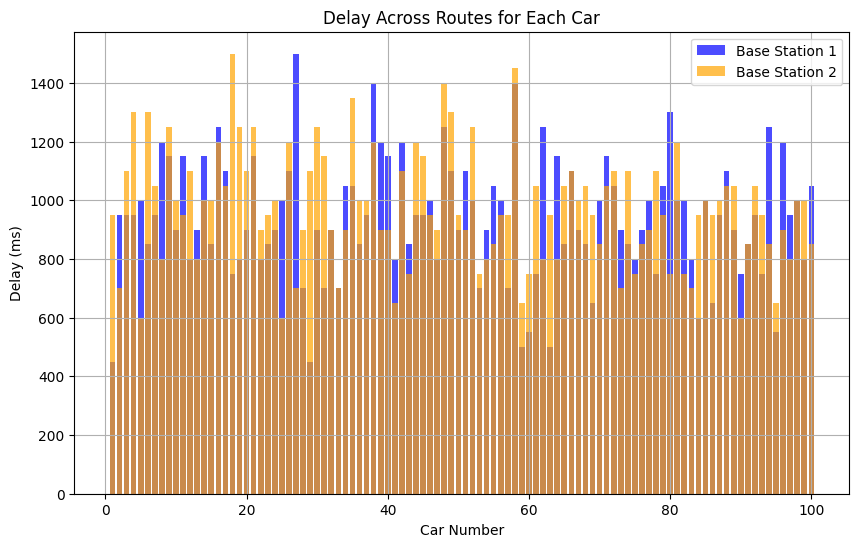

In [ ]:
#PLOTTING THE DELAY FOR EACH CAR GOING TO EITHER BASE STATIONS
# Extract delay for each route to Base Station 1
delays_1 = [objectives[1] for _, _, objectives in optimal_routes_1]

# Extract delay for each route to Base Station 2
delays_2 = [objectives[1] for _, _, objectives in optimal_routes_2]

# Plot the delays across routes
plt.figure(figsize=(10, 6))

plt.bar(range(1, 101), delays_1, label='Base Station 1', color='blue', alpha=0.7)
plt.bar(range(1, 101), delays_2, label='Base Station 2', color='orange', alpha=0.7)

plt.xlabel('Car Number')
plt.ylabel('Delay (ms)')
plt.title('Delay Across Routes for Each Car')
plt.legend()
plt.grid(True)
plt.show()


#### Genetic Algorithm

In [ ]:
import random

# Constants
CROSSOVER_PROBABILITY = 0.5
MUTATION_RATE = 0.1

def initialize_population(population_size, num_cars):
    population = []
    for _ in range(population_size):
        chromosome = [random.uniform(0, 6000) for _ in range(num_cars)]
        population.append(chromosome)
    return population

def calculate_transmission_rate(distance, distance_ranges, transmission_rates):
    for i in range(len(distance_ranges) - 1):
        if distance_ranges[i] <= distance < distance_ranges[i+1]:
            return transmission_rates[i]
    return 0

def calculate_latency(distances, num_cars, calculate_transmission_rate, distance_ranges, transmission_rates):
    latency = 0
    for i in range(num_cars - 1):
        transmission_rate = min(
            calculate_transmission_rate(distances[i], distance_ranges, transmission_rates),
            calculate_transmission_rate(distances[i+1], distance_ranges, transmission_rates)
        )
        latency += distances[i] / transmission_rate
    return latency

def evaluate_fitness(chromosome, num_cars, calculate_latency, calculate_transmission_rate, distance_ranges, transmission_rates):
    distances = chromosome[:num_cars]
    latency = calculate_latency(distances, num_cars, calculate_transmission_rate, distance_ranges, transmission_rates)
    return 1 / latency

def selection(population, fitness_values, population_size):
    selected_population = random.choices(population, weights=fitness_values, k=population_size)
    return selected_population

def crossover(parent1, parent2):
    offspring = []
    for gene1, gene2 in zip(parent1, parent2):
        if random.random() < CROSSOVER_PROBABILITY:
            offspring.append(gene1)
        else:
            offspring.append(gene2)
    return offspring

def mutation(chromosome):
    mutated_chromosome = []
    for gene in chromosome:
        if random.random() < MUTATION_RATE:
            mutated_chromosome.append(random.uniform(0, 6000))
        else:
            mutated_chromosome.append(gene)
    return mutated_chromosome

def replacement(mutated_population):
    return mutated_population

def main():
    # Define the distance ranges and transmission rates
    distance_ranges = [0, 1000, 2000, 3000, 4000, 5000, 6000]
    transmission_rates = [10, 8, 6, 4, 2, 1, 0]

    # Define the number of cars and base stations
    num_cars = 10
    num_base_stations = 2

    # Define the population size and number of generations
    population_size = 50
    num_generations = 100

    # Initialize the population
    population = initialize_population(population_size, num_cars)

    # Evolutionary loop
    for generation in range(num_generations):
        # Evaluate the fitness of each individual
        fitness_values = [
            evaluate_fitness(
                chromosome, num_cars, calculate_latency,
                calculate_transmission_rate, distance_ranges, transmission_rates
            ) for chromosome in population
        ]

        # Selection
        selected_population = selection(population, fitness_values, population_size)

        # Crossover
        offspring_population = [crossover(random.choice(selected_population), random.choice(selected_population)) for _ in range(population_size)]

        # Mutation
        mutated_population = [mutation(chromosome) for chromosome in offspring_population]

        # Replacement
        population = replacement(mutated_population)

    # Find the best solution
    best_chromosome = max(
        population, key=lambda x: evaluate_fitness(
            x, num_cars, calculate_latency,
            calculate_transmission_rate, distance_ranges, transmission_rates
        )
    )
    best_fitness = evaluate_fitness(
        best_chromosome, num_cars, calculate_latency,
        calculate_transmission_rate, distance_ranges, transmission_rates
    )

    print("Best routing path:", [f"Car-{i+1}" for i in range(num_cars)] + [f"BS-{num_base_stations}"])
    print("Best distances:", best_chromosome[:num_cars])
    print("Best fitness:", best_fitness)

if __name__ == "__main__":
    main()

Best routing path: ['Car-1', 'Car-2', 'Car-3', 'Car-4', 'Car-5', 'Car-6', 'Car-7', 'Car-8', 'Car-9', 'Car-10', 'BS-2']
Best distances: [21.84286692075732, 194.1426250172804, 230.9087366444651, 23.9981892657688, 351.2954495171301, 164.95858784026174, 46.43924844270475, 54.60799063768618, 282.4066053299279, 813.6756346408587]
Best fitness: 0.00729607311686844
